In [1]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tqdm import tqdm

In [2]:
DATASET_DIR = 'F:\AIUB\CPVR\dataset\Cat Dog Data'
TRAIN_DATASET = os.path.join(DATASET_DIR,'Train')
TEST_DATASET = os.path.join (DATASET_DIR,'Test')
print (DATASET_DIR)
print (TRAIN_DATASET)
print (TEST_DATASET)

F:\AIUB\CPVR\dataset\Cat Dog Data
F:\AIUB\CPVR\dataset\Cat Dog Data\Train
F:\AIUB\CPVR\dataset\Cat Dog Data\Test


In [3]:
CATEGORIES = []
for c in os.listdir(TRAIN_DATASET):
    CATEGORIES.append(c)
print (CATEGORIES)

['cats', 'dogs']


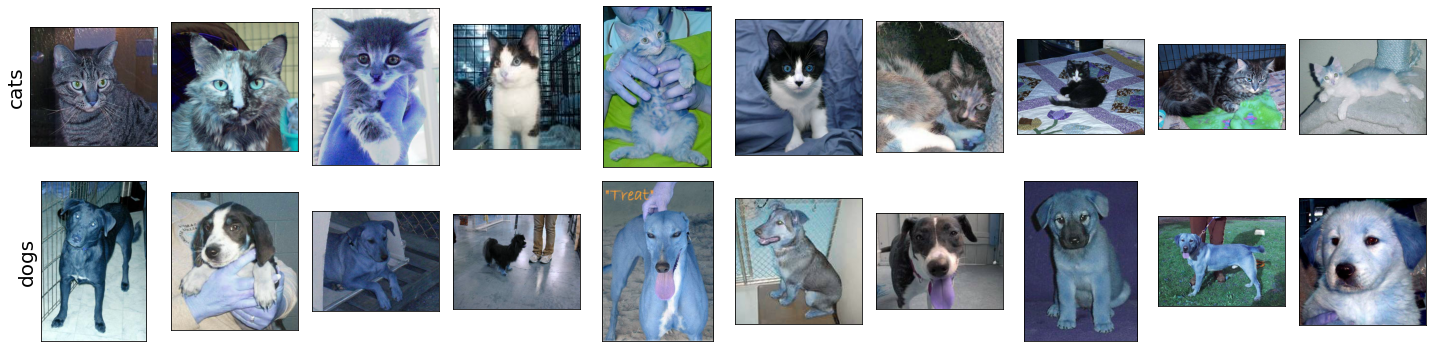

In [4]:
plt.figure(figsize=(20,5))
tmp = 0
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATASET,c)
    for img in os.listdir(path):
        img_arr = cv2.imread (os.path.join(path, img))
        plt.subplot(2,10, tmp+1)
        plt.imshow(img_arr, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        if tmp % 10 == 0:
            plt.ylabel (c, fontsize=20, color='black')
        tmp = tmp+1
        if tmp % 10 == 0:
            break;
plt.tight_layout()
plt.show()

In [5]:
IMG_SIZE = 64
train_data=[]
for c in CATEGORIES:
    path = os.path.join (TRAIN_DATASET,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir (path)):
        try:
            img_arr = cv2.imread(os.path.join(path,img))
            img_resized = cv2.resize (img_arr,(IMG_SIZE, IMG_SIZE))
            train_data.append ([img_resized, class_num])
        except Exception as e:
            pass

print (len(train_data))

100%|█████████████████████████████████████████████████████████████████████████████| 4006/4006 [00:10<00:00, 369.82it/s]

8005


In [6]:

test_data=[]
for c in CATEGORIES:
    path = os.path.join (TEST_DATASET,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir (path)):
        try:
            img_arr = cv2.imread(os.path.join(path,img))
            img_resized = cv2.resize (img_arr,(IMG_SIZE, IMG_SIZE))
            test_data.append ([img_resized, class_num])
        except Exception as e:
            pass

print (len(test_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1013/1013 [00:02<00:00, 338.40it/s]

2023


In [7]:
random.shuffle (train_data)
random.shuffle (test_data)

(8005, 64, 64, 3) (8005,)


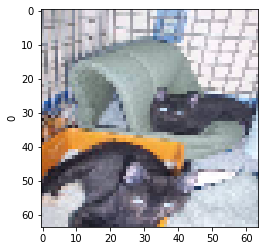

In [8]:
X_train = []
Y_train = []
for img,label in train_data:
    X_train.append (img)
    Y_train.append (label)

X_train = np.array(X_train).astype('float32').reshape (-1,64,64,3)
Y_train = np.array (Y_train)

print (X_train.shape, Y_train.shape)
plt.figure()
plt.imshow(X_train[2000].astype('uint8'))
plt.ylabel(Y_train[2000])
plt.show()

In [9]:

X_test = []
Y_test = []
for img,label in test_data:
    X_test.append (img)
    Y_test.append (label)

X_test = np.array(X_test).astype('float32').reshape (-1,64,64,3)
Y_test = np.array (Y_test)

print (X_test.shape, Y_test.shape)

(2023, 64, 64, 3) (2023,)


In [10]:
mean_rgb = np.mean(X_train, axis=(0,1,2))
print(mean_rgb)

[ 99.58259  111.99535  123.272934]


In [11]:
X_train_norm = np.empty_like(X_train)
X_test_norm = np.empty_like(X_test)

In [12]:

for i in range(len(X_train)):
    for c in range(3):
        if(c==1):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[1]
        else:
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[2]
            
for i in range(len(X_test)):
    for c in range(3):
        if(c==1):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[1]
        else:
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[2]

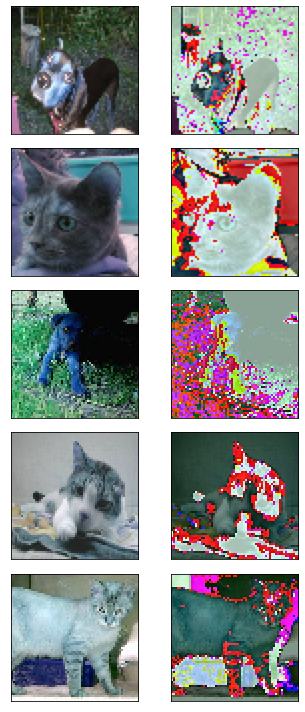

In [13]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [14]:

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
model = keras.Sequential([

    
    keras.Input(shape=X_train_norm.shape[1:]),

    
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),


    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),


    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),


    layers.Flatten(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 128)       0

In [15]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [16]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)

h = model.fit(x=X_train_norm, y=Y_train, 
              epochs=10, 
              validation_split=0.2,
              batch_size=128,
              callbacks=[cb]
             )

Epoch 1/10
51/51 [==============================] - 32s 472ms/step - loss: 0.7821 - accuracy: 0.5211 - val_loss: 0.7356 - val_accuracy: 0.5234
Epoch 2/10
51/51 [==============================] - 38s 744ms/step - loss: 0.6824 - accuracy: 0.5873 - val_loss: 0.6381 - val_accuracy: 0.6477
Epoch 3/10
51/51 [==============================] - 71s 1s/step - loss: 0.6231 - accuracy: 0.6547 - val_loss: 0.6173 - val_accuracy: 0.6771
Epoch 4/10
51/51 [==============================] - 148s 3s/step - loss: 0.6062 - accuracy: 0.6654 - val_loss: 0.5922 - val_accuracy: 0.7033
Epoch 5/10
51/51 [==============================] - 147s 3s/step - loss: 0.5434 - accuracy: 0.7269 - val_loss: 0.5486 - val_accuracy: 0.7202
Epoch 6/10
51/51 [==============================] - 138s 3s/step - loss: 0.5088 - accuracy: 0.7530 - val_loss: 0.5475 - val_accuracy: 0.7458
Epoch 7/10
51/51 [==============================] - 125s 2s/step - loss: 0.4663 - accuracy: 0.7801 - val_loss: 0.5992 - val_accuracy: 0.7008
Epoch 8/10

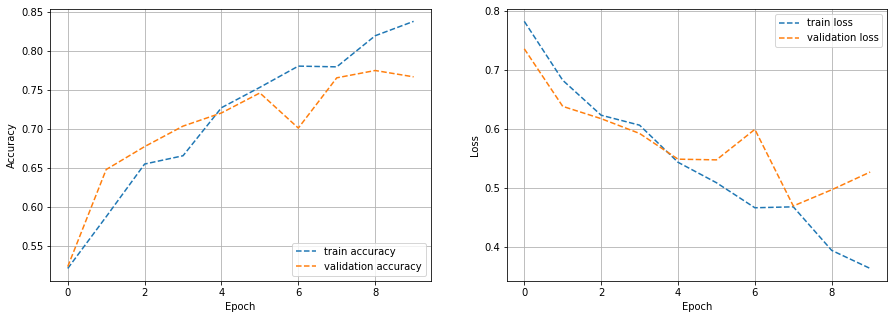

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()